# Neural Network For Handwritten Digits Classification 

In [59]:
#import paskages

import tensorflow as tf 
from tensorflow import keras

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Load datasets and split
(X_train ,y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [4]:
#length X_train 
len(X_train)

60000

In [5]:
#length X_test
len(X_test)

10000

In [6]:
#shape sample image 
X_train[0].shape

(28, 28)

In [36]:
#normalization image
X_train= X_train/255
X_test= X_test/255

<Figure size 640x480 with 0 Axes>

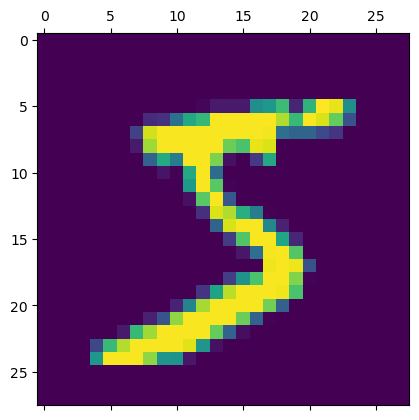

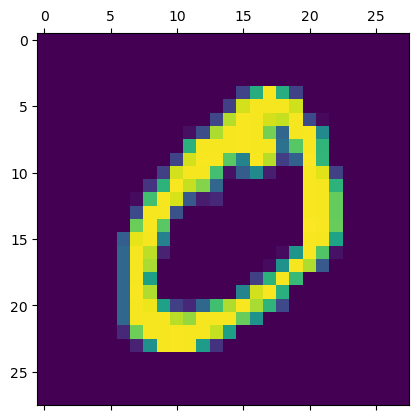

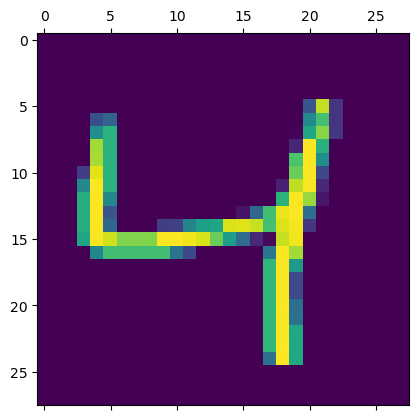

In [37]:
#show sample  image 
plt.figure() 
plt.matshow(X_train[0])
plt.matshow(X_train[1])
plt.matshow(X_train[2])

plt.show()

In [38]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [39]:
#reshape image
X_train_flatten = X_train.reshape(len(X_train) , 28*28)

X_test_flatten = X_test.reshape(len(X_test) , 28*28)

In [40]:
X_test_flatten.shape

(10000, 784)

In [41]:
X_train_flatten.shape

(60000, 784)

In [42]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape=(784,) ,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']            
  )

model.fit(X_train_flatten, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4664 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3034 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2829 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9260


In [44]:
#Evaluation model
model.evaluate(X_test_flatten ,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2701 - accuracy: 0.9263


[0.2701150178909302, 0.9262999892234802]

In [49]:
#predicted X_test data 
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


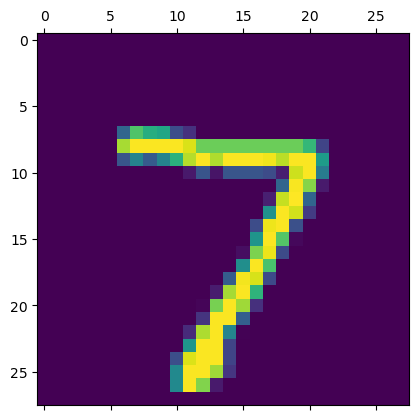

In [46]:
plt.matshow(X_test[0])

In [50]:
y_predicted[0]

array([1.7352534e-02, 3.1649031e-07, 4.5613118e-02, 9.3995816e-01,
       2.7185227e-03, 7.7763431e-02, 1.1223875e-06, 9.9972636e-01,
       1.3286512e-01, 5.8436513e-01], dtype=float32)

In [51]:
np.argmax(y_predicted[0])

7

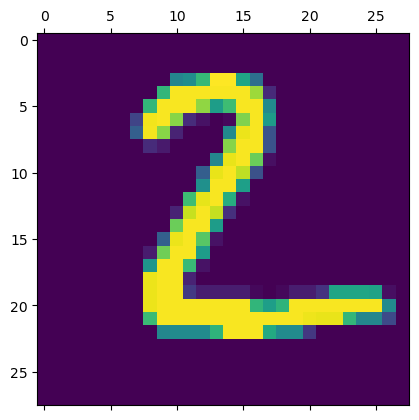

In [52]:
plt.matshow(X_test[1])

In [53]:
np.argmax(y_predicted[1])

2

In [55]:
y_predicted_labels = np.argmax(y_predicted, axis=1)


In [58]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    3,    2,    0,    4,    4,    2,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   4,    9,  929,   10,    9,    3,   11,    9,   45,    3],
       [   3,    0,   20,  918,    1,   19,    2,   10,   31,    6],
       [   1,    1,    5,    1,  933,    0,   10,    3,   12,   16],
       [  10,    3,    3,   35,   12,  761,   15,    7,   42,    4],
       [  12,    3,    7,    1,    8,    9,  910,    2,    6,    0],
       [   1,    6,   25,    7,   10,    0,    0,  948,    6,   25],
       [   5,    7,    6,   17,    9,   17,    6,    8,  895,    4],
       [   9,    7,    2,    9,   44,    6,    0,   22,   13,  897]])>

Text(50.722222222222214, 0.5, 'Truth')

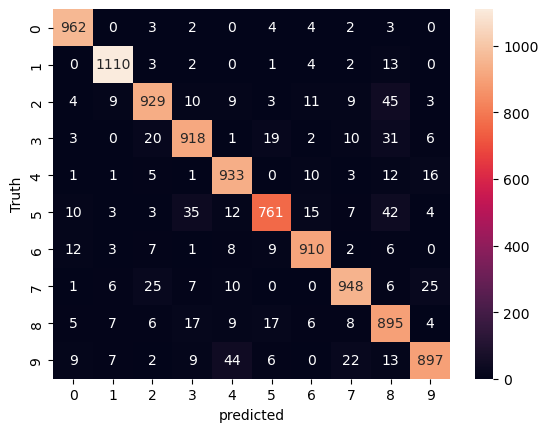

In [60]:
plt.figure()
sns.heatmap(cm , annot=True , fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

In [62]:
#Add hidden layer

In [61]:
model = keras.Sequential([
    keras.layers.Dense(100 , input_shape=(784,) ,activation='relu'),
    keras.layers.Dense(10 ,activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']            
  )

model.fit(X_train_flatten, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4225 - accuracy: 0.8921
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2033 - accuracy: 0.9418
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1514 - accuracy: 0.9571
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1200 - accuracy: 0.9653
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0980 - accuracy: 0.9720


In [64]:
model.evaluate(X_test_flatten ,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1093 - accuracy: 0.9667


[0.10933691263198853, 0.96670001745224]

In [65]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    3,    2,    0,    4,    4,    2,    3,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   4,    9,  929,   10,    9,    3,   11,    9,   45,    3],
       [   3,    0,   20,  918,    1,   19,    2,   10,   31,    6],
       [   1,    1,    5,    1,  933,    0,   10,    3,   12,   16],
       [  10,    3,    3,   35,   12,  761,   15,    7,   42,    4],
       [  12,    3,    7,    1,    8,    9,  910,    2,    6,    0],
       [   1,    6,   25,    7,   10,    0,    0,  948,    6,   25],
       [   5,    7,    6,   17,    9,   17,    6,    8,  895,    4],
       [   9,    7,    2,    9,   44,    6,    0,   22,   13,  897]])>

Text(50.722222222222214, 0.5, 'Truth')

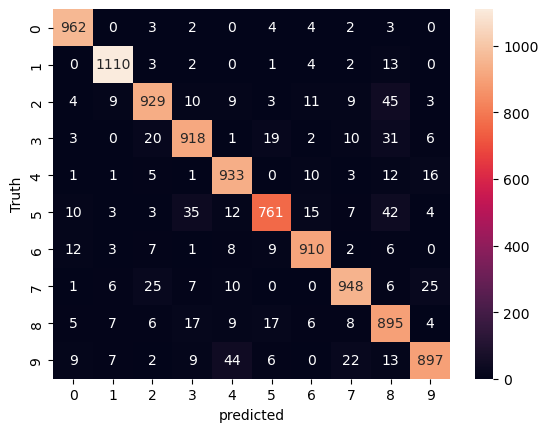

In [66]:
plt.figure()
sns.heatmap(cm , annot=True , fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

In [ ]:

#Layer flatten

In [68]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100 ,activation='relu'),
    keras.layers.Dense(10 ,activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']            
  )

model.fit(X_train, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2714 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1198 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0847 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0630 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0515 - accuracy: 0.9841
